# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [6]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [11]:
# your code here- numerical variable
numerical=titanic.select_dtypes([int,float])
numerical.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
#your code here- categorical variable
categorical=titanic.select_dtypes(object)
categorical.columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [31]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize']=(12,6)
sns.set_style('whitegrid')

#### Use the appropriate visulalization to show the distribution of the column `Age`

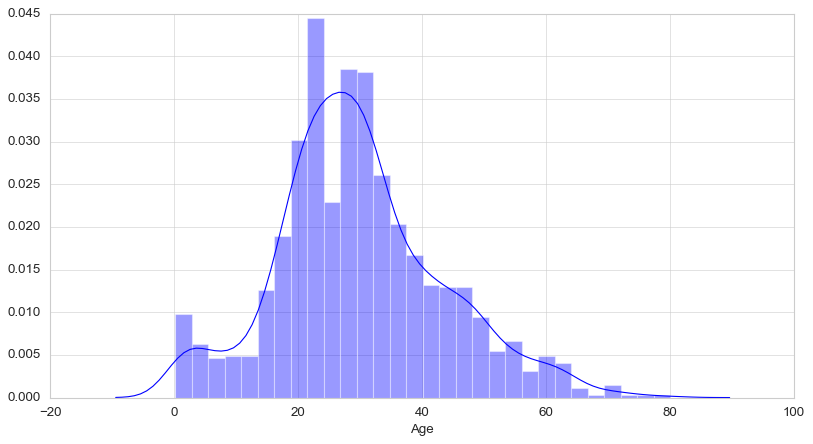

In [32]:
# your code here
titanic['Age']
sns.distplot(titanic['Age'])

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

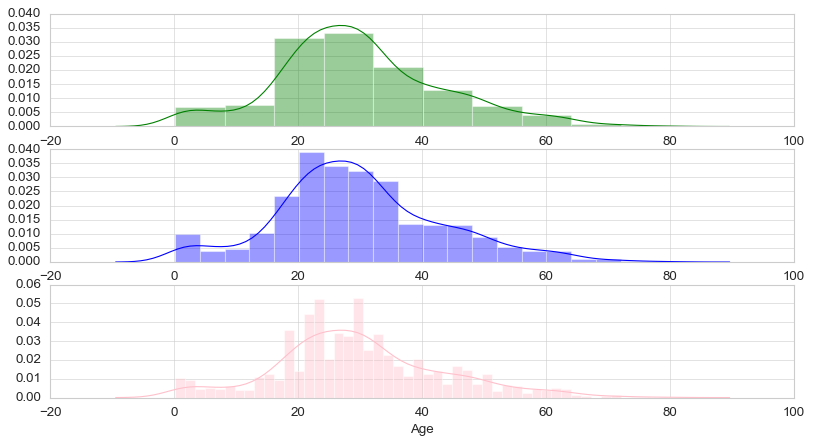

In [33]:
# your code here
plt.subplot(3,1,1)
sns.distplot(titanic['Age'],bins=10,color='green')
plt.subplot(3,1,2)
sns.distplot(titanic['Age'],bins=20,color='blue')
plt.subplot(3,1,3)
sns.distplot(titanic['Age'],bins=50,color='pink')

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
#The distribution is the same, the only thing that changes is the size of the columns.

#### Use seaborn to show the distribution of the column `Age`

In [34]:
# your code here
#already done!!!1

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

<BarContainer object of 2 artists>

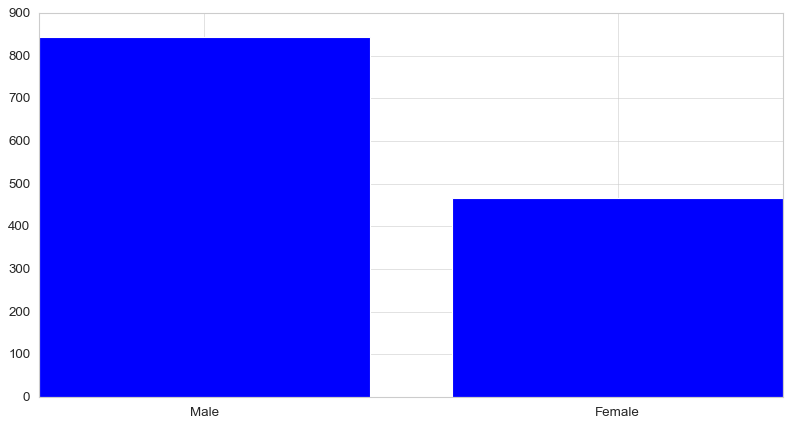

In [60]:
# your code here- 1st way
m=titanic[titanic['Gender']=='male'].Gender.count()
f=titanic[titanic['Gender']=='female'].Gender.count()
plt.bar(['Male','Female'],[m,f])

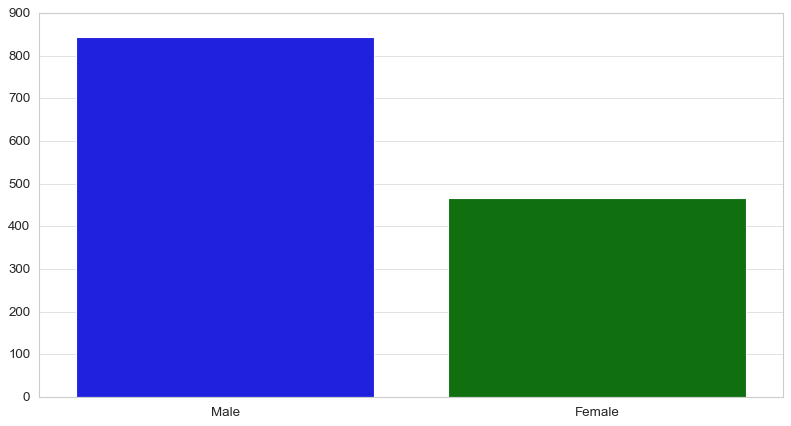

In [62]:
# your code here- 2nd way
sns.barplot(['Male','Female'],[m,f])

#### Use the appropriate plot to visualize the column `Pclass` 


Text(0, 0.5, 'Number of passengers/class')

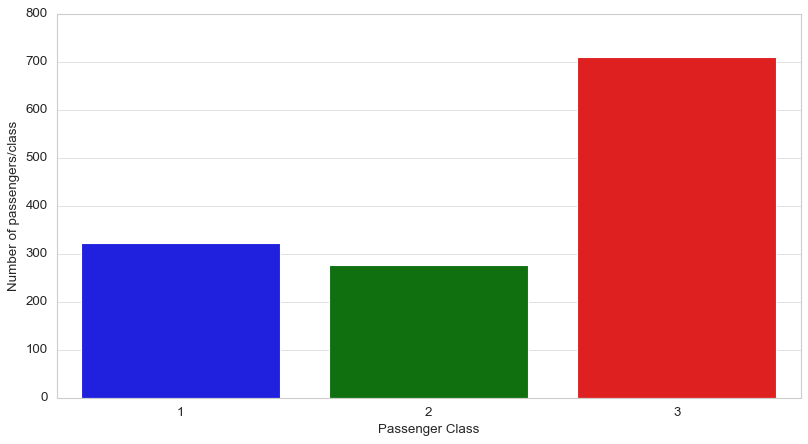

In [66]:
# your code here
c1=titanic[titanic['Pclass']==1].Pclass.count()
c2=titanic[titanic['Pclass']==2].Pclass.count()
c3=titanic[titanic['Pclass']==3].Pclass.count()
sns.barplot([1,2,3],[c1,c2,c3])
plt.xlabel("Passenger Class")
plt.ylabel("Number of passengers/class")

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

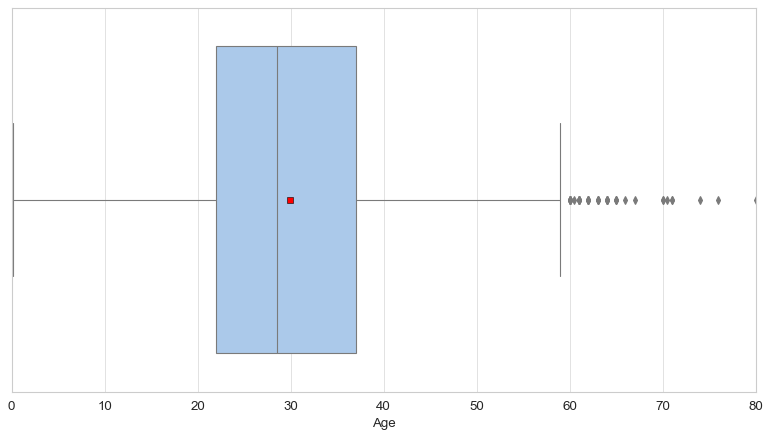

In [71]:
# your code here
sns.boxplot(titanic['Age'],palette='pastel',showmeans=True)


#### What does the previous plot tell you about the feature `Age`? Comment.

In [76]:
# your comment here
#los datos mas cercanos a la media estan entre los 20 y 40 años.
#los valores atípicos son los años que se encuentra a partir de 60 años.
#La media es mas o menos 30 años.
#la mediana es mas o menos 28 años

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

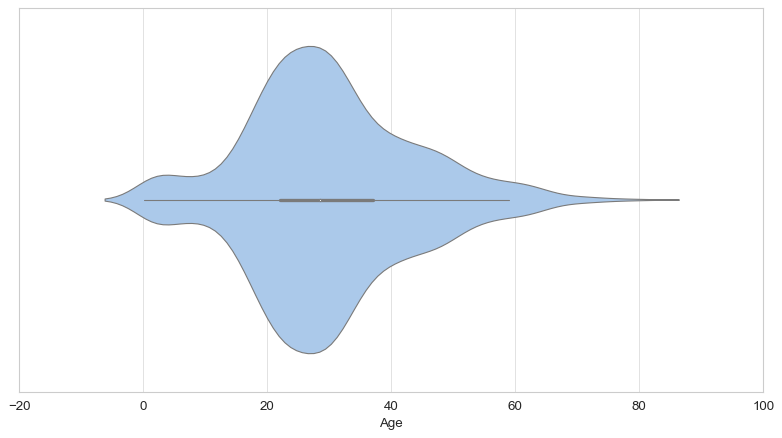

In [86]:
#your code here
sns.violinplot(titanic['Age'],palette='pastel',split=True)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [88]:
#your comment here
#asimétrico hacia la derecha
#que la mayoria de los datos están entre los 20 y los 40 años
#moda alrededor de los 25/30 años

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

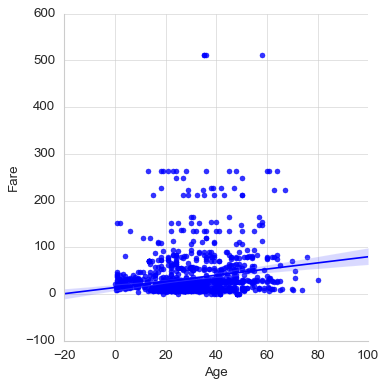

In [108]:
#your code-1st way
sns.lmplot(x='Age',y='Fare',data=titanic)


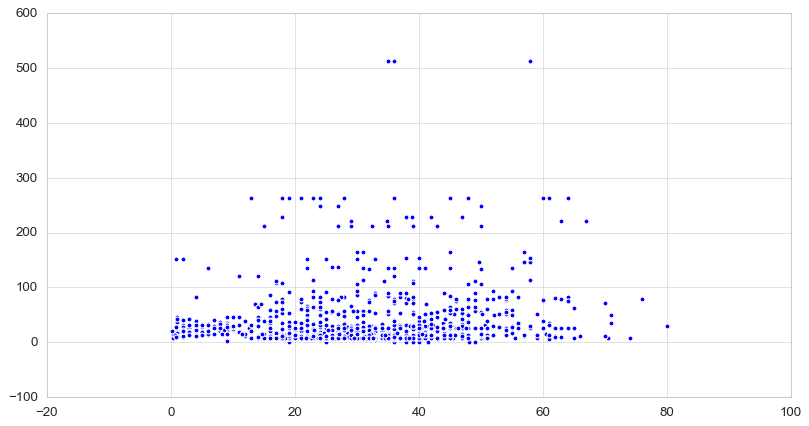

In [109]:
# your code-2nd way
x=titanic['Age']
y=titanic['Fare']
plt.scatter(x,y)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

(7.0, 0)

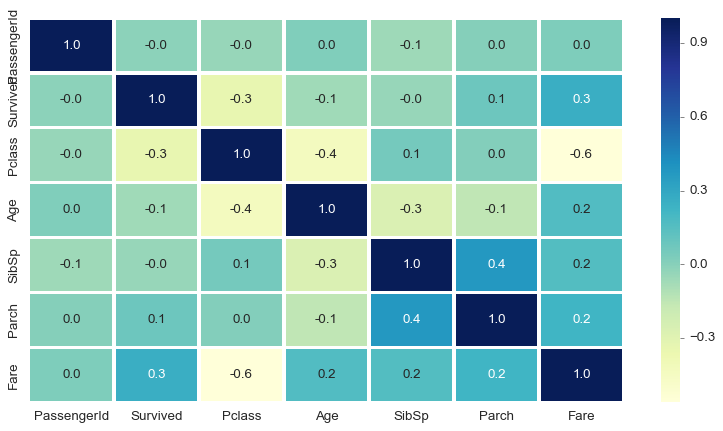

In [122]:
#your code here
ax=sns.heatmap(titanic.corr(),cmap='YlGnBu',linewidth=2,fmt='.1f',annot=True)
ax.set_ylim(7.0,0)

#### According to the previous plot, what are the most correlated feature? Comment.

In [123]:
#your comment here
#Pclass y fare relacionados inversamente

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

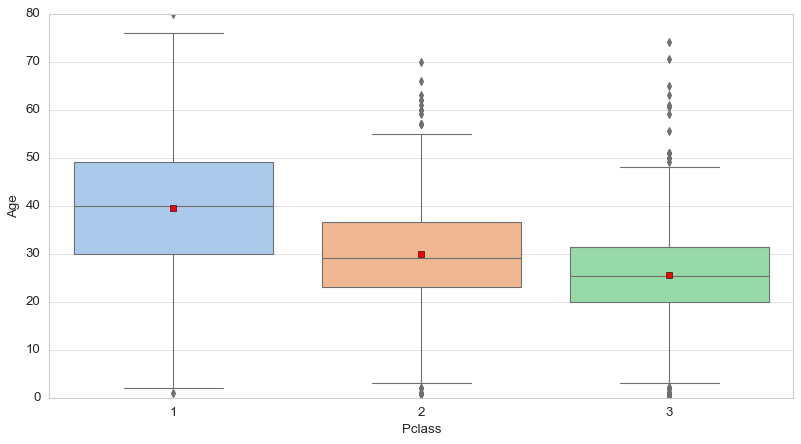

In [125]:
#your code here
sns.boxplot(titanic['Pclass'],titanic['Age'],palette='pastel',showmeans=True)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

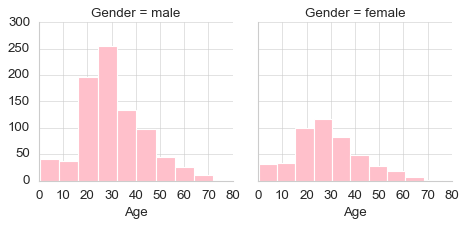

In [133]:
#your code here
g = sns.FacetGrid(titanic, col="Gender")
g = g.map(plt.hist, "Age", color="pink")